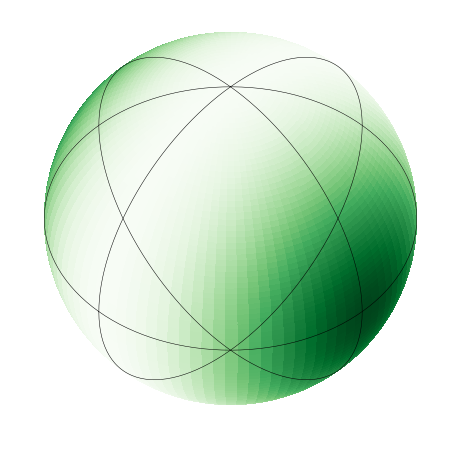

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LightSource



fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d', proj_type='ortho')
ax.view_init(elev=45, azim=45)
ls = LightSource(azdeg=45, altdeg=45)
plt.axis('off')

# Surface
u = np.linspace(0, 2 * np.pi, 200)
v = np.linspace(0, np.pi, 200)

x = 1 * np.outer(np.cos(u), np.sin(v))
y = 1 * np.outer(np.sin(u), np.sin(v))
z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))

cmap = plt.cm.Greens
rot = 0 / 180 * np.pi
elev = 45
# ax.plot_surface(x, y, z, rstride=4, cstride=4, facecolors=cmap(x), linewidth=0, alpha=1)
ax.plot_surface(x, y, z, facecolors=cmap(y**2), 
                lightsource=ls, shade=False, antialiased=False, 
                alpha=1, linewidth=0, zorder=0.1,
                rcount=120, ccount=120)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])

# Set aspect ratio
xyzlim = np.array([ax.get_xlim3d(), ax.get_ylim3d(), ax.get_zlim3d()]).T
XYZlim = [min(xyzlim[0]), max(xyzlim[1])]
ax.set_xlim3d(XYZlim)
ax.set_ylim3d(XYZlim)
ax.set_zlim3d(XYZlim)
ax.set_box_aspect((1, 1, 1), zoom=1.5)

# Final touches
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.axis('off')



ax2 = fig.add_axes(ax.get_position(), projection='3d')
ax2.set_proj_type('ortho')
ax2.view_init(elev=45, azim=45)
ax2.patch.set_alpha(0)

# equator
u = np.linspace(0, np.pi*2, 256)
v = np.pi/2
x = np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.cos(v)
ax2.plot(x,y,z, linewidth=0.5, color=[0,0,0], zorder=0.3)

u = 0
v = np.linspace(0, np.pi*2, 256)
x = np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.cos(v)
ax2.plot(x,y,z, linewidth=0.5, color=[0,0,0])

u = np.pi/2
v = np.linspace(0, np.pi*2, 256)
x = np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.cos(v)
ax2.plot(x,y,z, linewidth=0.5, color=[0,0,0])

ax2.set_xlim([-1,1])
ax2.set_ylim([-1,1])
ax2.set_zlim([-1,1])

# Set aspect ratio
xyzlim = np.array([ax2.get_xlim3d(), ax2.get_ylim3d(), ax2.get_zlim3d()]).T
XYZlim = [min(xyzlim[0]), max(xyzlim[1])]
ax2.set_xlim3d(XYZlim)
ax2.set_ylim3d(XYZlim)
ax2.set_zlim3d(XYZlim)
ax2.set_box_aspect((1, 1, 1), zoom=1.5)

# Final touches
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_zticks([])
plt.axis('off')


plt.show()

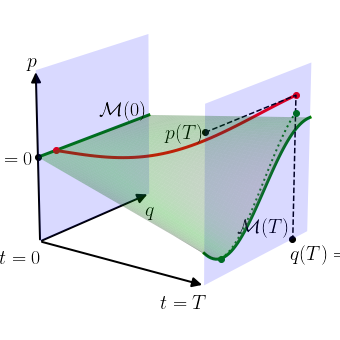

In [26]:
from pylab import *
from mpl_toolkits.mplot3d import *

from matplotlib.collections import PolyCollection
from matplotlib.colors import colorConverter
from matplotlib.patches import FancyArrowPatch

rc('text', usetex=True)
rc('font', size=20)

fig = figure(figsize=(11,6))
ax = fig.gca(projection='3d')

ax.set_axis_off()

def f(x,t):
    return t/2 * 0.55*(sin(2*x)+0.4*x**2-0.65)

c_plane   = colorConverter.to_rgba('b', alpha=0.15)

N = 50
y = linspace(-1,1,N)
t = linspace(0,2,N)
yy, tt = meshgrid(y, t)
zz = f(yy,tt)

ax.plot(0*ones(y.shape), y, f(y,0), '-g', linewidth=3)
ax.plot(2*ones(y.shape), y, f(y,2), '-g', linewidth=3)

yt = 0.7*y
zt = f(yt, t) + 0.2*t

ax.plot(t, yt, zt, '-r', linewidth=3)
ax.plot((0,2), (yt[0], yt[-1]), (zt[0], zt[-1]), 'or')

ax.plot([2,2,2], [-1,yt[-1],yt[-1]], [zt[-1],zt[-1],-1], 'k--')
ax.plot(2*ones(y.shape), yt, f(yt,2)+0.1*(y+1), 'g:', linewidth=2)
ax.plot((2,2),
(yt[0], yt[-1]),
(f(yt[0], 2), f(yt[-1], 2) + 0.1*(y[-1]+1)), 'og')
ax.plot((0,2,2),
(-1,-1,zt[-1]),
(0,yt[-1],-1), 'ok')

ax.text(0, -1.1, 0, r'$p(0)=0$', ha='right', va='center')
ax.text(2, -1.05, zt[-1], r'$p(T)$', ha='right', va='center')
ax.text(0, -1.0, 1, r'$p$', ha='right', va='bottom')
ax.text(0, 1, -1.1, r'$q$', ha='center', va='top')
ax.text(0, -1, -1.1, r'$t=0$', ha='right', va='top')
ax.text(2, -1, -1.1, r'$t=T$', ha='right', va='top')
ax.text(2, yt[-1]-0.05, -1.05, r'$q(T)=q^*$', ha='left', va='top')
ax.text(0, 0.5, 0.05, r'$\mathcal{M}(0)$', ha='center', va='bottom')
ax.text(2, 0.1, -0.8, r'$\mathcal{M}(T)$', ha='center', va='bottom')

arrowprops = dict(mutation_scale=20,
linewidth=2,
arrowstyle='-|>',
color='k')

# For arrows, see
# https://stackoverflow.com/questions/29188612/arrows-in-matplotlib-using-mplot3d
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

a = Arrow3D([0,2], [-1,-1], [-1,-1], **arrowprops)
ax.add_artist(a)
a = Arrow3D([0,0], [-1,-1], [-1,1], **arrowprops)
ax.add_artist(a)
a = Arrow3D([0,0], [-1,1], [-1,-1], **arrowprops)
ax.add_artist(a)

# For surface illumination, see
# http://physicalmodelingwithpython.blogspot.de/2015/08/illuminating-surface-plots.html

# Get lighting object for shading surface plots.
from matplotlib.colors import LightSource

# Get colormaps to use with lighting object.
from matplotlib import cm

# Create an instance of a LightSource and use it to illuminate the surface.
light = LightSource(70, -120)
white = np.ones((zz.shape[0], zz.shape[1], 3))
illuminated_surface = light.shade_rgb(white*(0,1,0), zz)

ax.plot_surface(tt, yy, zz,
cstride=1, rstride=1,
alpha=0.3, facecolors=illuminated_surface,
linewidth=0)

verts = [array([(-1,-1), (-1,1), (1,1), (1,-1), (-1,-1)])]

poly = PolyCollection(verts, facecolors=c_plane)
ax.add_collection3d(poly, zs=[0], zdir='x')
poly = PolyCollection(verts, facecolors=c_plane)
ax.add_collection3d(poly, zs=[2], zdir='x')

ax.set_xlim3d(0, 2)
ax.view_init(elev=18, azim=-54)

show()

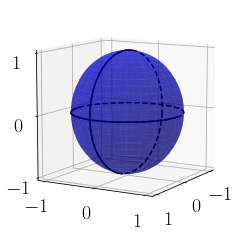

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.set_aspect('equal')

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

x = 1 * np.outer(np.cos(u), np.sin(v))
y = 1 * np.outer(np.sin(u), np.sin(v))
z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))
#for i in range(2):
#    ax.plot_surface(x+random.randint(-5,5), y+random.randint(-5,5), z+random.randint(-5,5),  rstride=4, cstride=4, color='b', linewidth=0, alpha=0.5)
elev = 10.0
rot = 80.0 / 180 * np.pi
ax.plot_surface(x, y, z,  rstride=4, cstride=4, color='b', linewidth=0, alpha=0.5)
#calculate vectors for "vertical" circle
a = np.array([-np.sin(elev / 180 * np.pi), 0, np.cos(elev / 180 * np.pi)])
b = np.array([0, 1, 0])
b = b * np.cos(rot) + np.cross(a, b) * np.sin(rot) + a * np.dot(a, b) * (1 - np.cos(rot))
ax.plot(np.sin(u),np.cos(u),0,color='k', linestyle = 'dashed')
horiz_front = np.linspace(0, np.pi, 100)
ax.plot(np.sin(horiz_front),np.cos(horiz_front),0,color='k')
vert_front = np.linspace(np.pi / 2, 3 * np.pi / 2, 100)
ax.plot(a[0] * np.sin(u) + b[0] * np.cos(u), b[1] * np.cos(u), a[2] * np.sin(u) + b[2] * np.cos(u),color='k', linestyle = 'dashed')
ax.plot(a[0] * np.sin(vert_front) + b[0] * np.cos(vert_front), b[1] * np.cos(vert_front), a[2] * np.sin(vert_front) + b[2] * np.cos(vert_front),color='k')

ax.view_init(elev = elev, azim = 30)
ax.set_box_aspect((1, 1, 1))


plt.show()

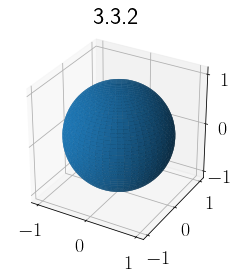

In [5]:

from itertools import product, combinations
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
plt.ion()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Make data
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
ax.plot_surface(x, y, z)

# #draw cube
# r = [-1, 1]
# for s, e in combinations(np.array(list(product(r,r,r))), 2):
#     if np.sum(np.abs(s-e)) == r[1]-r[0]:
#         ax.plot3D(*zip(s,e), color="b")


# Make axes limits 
xyzlim = np.array([ax.get_xlim3d(),ax.get_ylim3d(),ax.get_zlim3d()]).T
XYZlim = [min(xyzlim[0]),max(xyzlim[1])]
ax.set_xlim3d(XYZlim)
ax.set_ylim3d(XYZlim)
ax.set_zlim3d(XYZlim)
try:
    ax.set_aspect('equal')
except NotImplementedError:
    pass

ax.set_title(f"{matplotlib.__version__}")
ax.set_box_aspect((1, 1, 1))
plt.show()


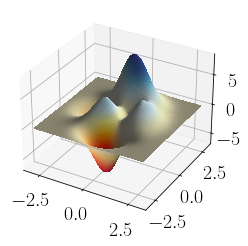

In [6]:

"""
Example showing shaded 3d plots. It is based on the [shading example](
http://matplotlib.org/examples/pylab_examples/shading_example.html).
The surface used is the Matlab `peaks()`.
"""

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LightSource

fig = plt.figure()
ax = fig.gca(projection='3d')

# Test data: Matlab `peaks()`
x, y = np.mgrid[-3:3:150j,-3:3:150j]
z =  3*(1 - x)**2 * np.exp(-x**2 - (y + 1)**2) \
   - 10*(x/5 - x**3 - y**5)*np.exp(-x**2 - y**2) \
   - 1./3*np.exp(-(x + 1)**2 - y**2) 

# create light source object.
ls = LightSource(azdeg=0, altdeg=65)
# shade data, creating an rgb array.
rgb = ls.shade(z, plt.cm.RdYlBu)
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, linewidth=0,
                       antialiased=False, facecolors=rgb)


plt.show()

In [7]:
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

def cart2sph(x, y, z):
    dxy = np.sqrt(x**2 + y**2)
    r = np.sqrt(dxy**2 + z**2)
    theta = np.arctan2(y, x)
    phi = np.arctan2(z, dxy)
    theta, phi = np.rad2deg([theta, phi])
    return theta % 360, phi, r

def sph2cart(theta, phi, r=1):
    theta, phi = np.deg2rad([theta, phi])
    z = r * np.sin(phi)
    rcosphi = r * np.cos(phi)
    x = rcosphi * np.cos(theta)
    y = rcosphi * np.sin(theta)
    return x, y, z

# random data
pts = 1 - 2 * np.random.rand(500, 3)
l = np.sqrt(np.sum(pts**2, axis=1))
pts = pts / l[:, np.newaxis]
T = 150 * np.random.rand(500)

# naive IDW-like interpolation on regular grid
theta, phi, r = cart2sph(*pts.T)
nrows, ncols = (90,180)
lon, lat = np.meshgrid(np.linspace(0,360,ncols), np.linspace(-90,90,nrows))
xg,yg,zg = sph2cart(lon,lat)
Ti = np.zeros_like(lon)
for r in range(nrows):
    for c in range(ncols):
        v = np.array([xg[r,c], yg[r,c], zg[r,c]])
        angs = np.arccos(np.dot(pts, v))
        idx = np.where(angs == 0)[0]
        if idx.any():
            Ti[r,c] = T[idx[0]]
        else:
            idw = 1 / angs**2 / sum(1 / angs**2)
            Ti[r,c] = np.sum(T * idw)

# set up map projection
map = Basemap(projection='ortho', lat_0=45, lon_0=15)
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))
# compute native map projection coordinates of lat/lon grid.
x, y = map(lon, lat)
# contour data over the map.
cs = map.contourf(x, y, Ti, 15)
plt.title('Contours of T')
plt.show()

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'